In [1]:
# Beachwatch Logistic Regressions

In [2]:
import matplotlib.pyplot as plt 
import metapack as mp
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
import metapack as mp
pkg = mp.open_package('http://library.metatab.org/sandiegodata.org-beachwatch-4.zip')
beachwatch =    pkg.resource('beachwatch').read_csv(parse_dates=True)
measure_codes = pkg.resource('measure_codes').read_csv(parse_dates=True)
stations =      pkg.resource('stations').read_csv(parse_dates=True)

beachwatch.head()

,stationcode,stationgroup,sampledate,collectiontime,measure_code,analyte,methodname,unit,result,result_group_count,...,lresult_gt_lmedian,lresult_gt_lmean,lresult_lte_25pctl,lresult_gte_75pctl,labbatch,resultqualcode,qacode,sampleagency,labagency,submittingagency
0,EH-010,EH,1999-05-26,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-5/26/1999,<,NR,SDCDEH,SDCDEH,SDCDEH
1,EH-010,EH,1999-10-13,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,0.0,213,...,0.0,0.0,0.0,0.0,SH-10/13/1999,=,NR,SDCDEH,SDCDEH,SDCDEH
2,EH-010,EH,1999-10-26,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-10/26/1999,<,NR,SDCDEH,SDCDEH,SDCDEH
3,EH-010,EH,2000-03-21,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-3/21/2000,<,NR,SDCDEH,SDCDEH,SDCDEH
4,EH-010,EH,2000-05-24,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,230.0,213,...,1.0,1.0,0.0,1.0,SH-5/24/2000,=,NR,SDCDEH,SDCDEH,SDCDEH


In [4]:

beachwatch.lresult_gt_lmedian.value_counts(dropna=False)

0.0    136183
1.0     66074
Name: lresult_gt_lmedian, dtype: int64

In [5]:
# Proportion of gt_mean and mt_median that are different. 
len(beachwatch[ beachwatch.lresult_gt_lmedian.notnull() & beachwatch.lresult_gt_lmedian.notnull() &  
        (beachwatch.lresult_gt_lmedian != beachwatch.lresult_gt_lmean)])  / len(beachwatch)

0.043489224105964196

# Merge in environmental data

In [6]:
env_pkg =  mp.open_package('http://library.metatab.org/sandiegodata.org-water_quality-4.zip')

In [7]:
trr = env_pkg.resource('tides_river_rain').read_csv(parse_dates=True).set_index('date')
trr.head()

,discharge_rate,recent_total_discharge,recent_max_discharge,dailyprecip,recent_precip,wl_max,wl_min
date,,,,,,,
1988-01-01,22.0,22.0,22.0,NaN,NaN,NaN,NaN
1988-01-02,20.0,42.0,42.0,NaN,NaN,NaN,NaN
1988-01-03,18.0,60.0,60.0,NaN,NaN,NaN,NaN
1988-01-04,18.0,56.0,60.0,NaN,NaN,NaN,NaN
1988-01-05,21.0,57.0,60.0,NaN,NaN,NaN,NaN


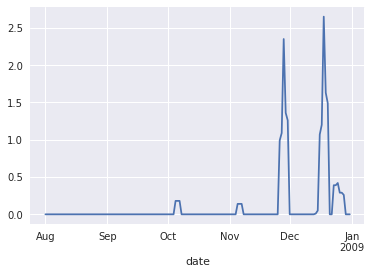

In [8]:
trr.loc['2007':'2008'].recent_precip.plot()

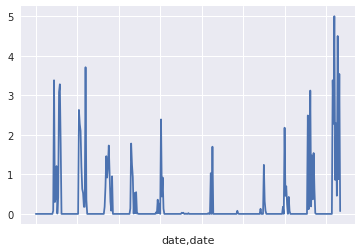

In [55]:
trr.groupby(by=[trr.index.month, trr.index.year]).sum().dailyprecip.plot()

In [31]:
bw_env = beachwatch.set_index('sampledate').join(trr)
bw_env['high_flow'] =  (bw_env.recent_total_discharge > bw_env.recent_total_discharge.median()).astype(int)
bw_env['ldischarge_rate'] = np.log(bw_env.discharge_rate)
bw_env.head()

,stationcode,stationgroup,collectiontime,measure_code,analyte,methodname,unit,result,result_group_count,result_group_std,...,submittingagency,discharge_rate,recent_total_discharge,recent_max_discharge,dailyprecip,recent_precip,wl_max,wl_min,high_flow,ldischarge_rate
1998-07-21,SE-010,SE,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,4.0,527,225.561709,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-010,SE,2018-08-11,9,"Coliform, Total",MTF,MPN/100 mL,4.0,530,309.086717,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-010,SE,2018-08-11,26,Enterococcus,MTF,MPN/100 mL,2.0,488,148.631518,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-020,SE,2018-08-11,0,"Coliform, Fecal",MTF,MPN/100 mL,23.0,477,128.262880,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752
1998-07-21,SE-020,SE,2018-08-11,9,"Coliform, Total",MTF,MPN/100 mL,23.0,477,263.711243,...,SEJPA,8.8,27.0,27.4,NaN,NaN,NaN,NaN,1,2.174752


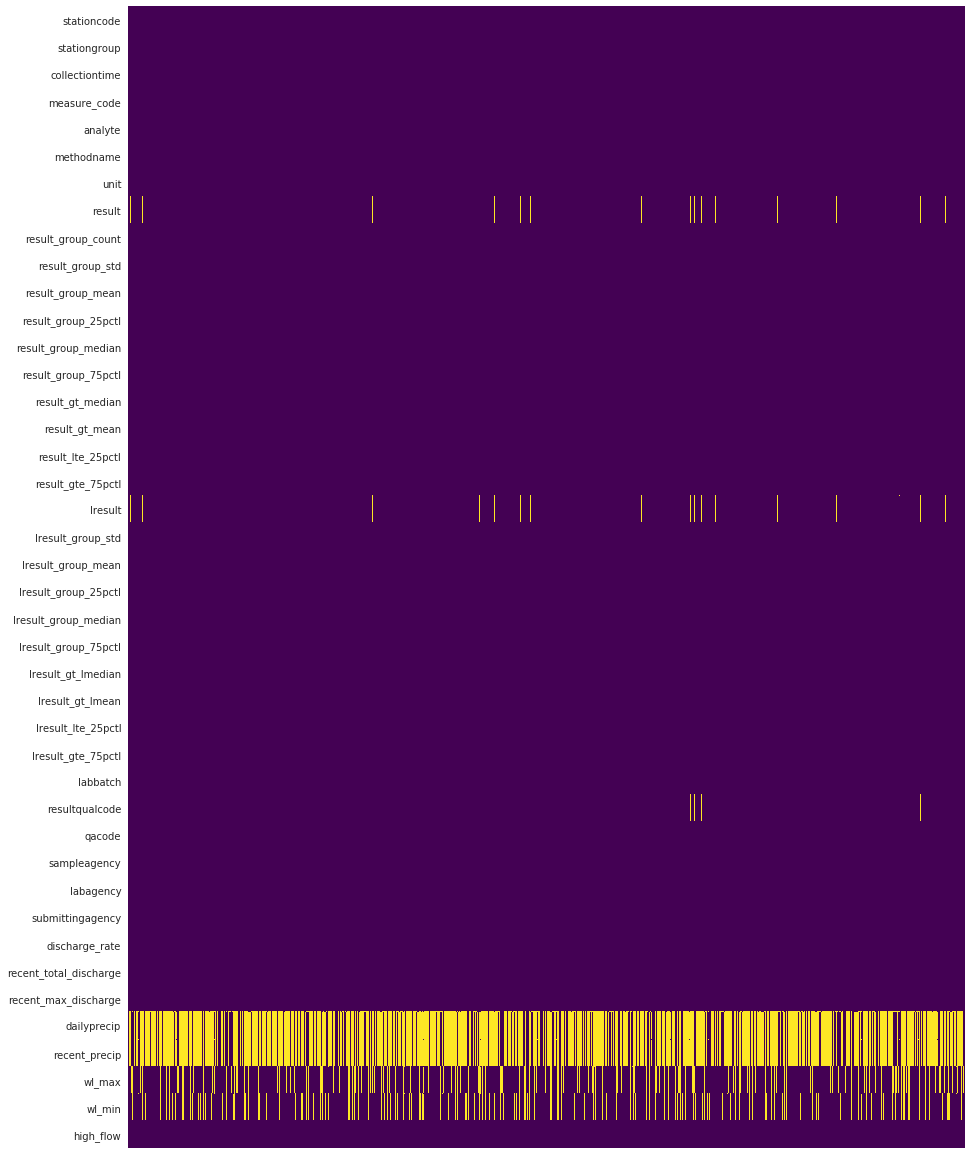

In [10]:
fig, ax = plt.subplots(figsize=(15,.5*len(bw_env.columns)))
sns.heatmap(bw_env.sample(10000).isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax );

In [11]:
sum(bw_env.recent_precip > 0.0)

8440

In [26]:
bw_env.groupby('lresult_gt_lmean').mean().discharge_rate.reset_index()

,lresult_gt_lmean,discharge_rate
0,0.0,10.482232
1,1.0,47.200024


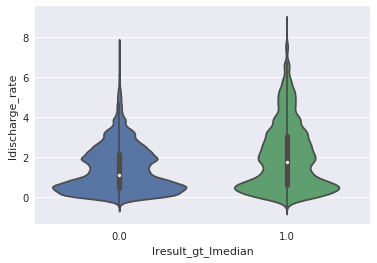

In [33]:
ax = sns.violinplot(x=bw_env.lresult_gt_lmedian, y=bw_env.ldischarge_rate)

In [20]:
bw_env.groupby('lresult_gt_lmean').discharge_rate.agg(['mean','std','median'])

,mean,std,median
lresult_gt_lmean,,,
0.0,10.482232,36.187658,3.15
1.0,47.200024,195.216645,5.70


In [34]:
bw_env.groupby('lresult_gt_lmean').mean().recent_precip

lresult_gt_lmean
0.0    0.024758
1.0    0.129421
Name: recent_precip, dtype: float64

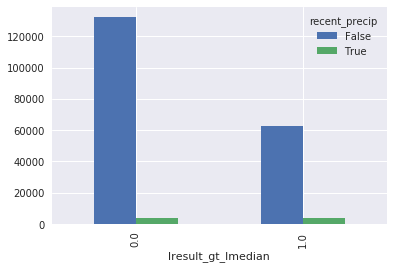

In [36]:
pd.crosstab(bw_env.lresult_gt_lmedian, bw_env.recent_precip > 0.01 ).plot(kind='bar')

In [38]:
def logit(y,X):
    import statsmodels.api as sm

    X_ = pd.DataFrame()
   
    X_['X'] = X
    X_['const'] = 1

    logit_model=sm.Logit(y,X_)
    result=logit_model.fit()
    print(result.summary())

    # Odds ratio and conf interval
    params = result.params
    conf = result.conf_int()
    conf['OR'] = params
    conf.columns = ['2.5%', '97.5%', 'OR']
    print(np.exp(conf))
    
logit(
    y = bw_env.lresult_gt_lmedian.astype(int), 
    X = (bw_env.recent_precip.fillna(0) > 0).astype(int)
)

Optimization terminated successfully.
         Current function value: 0.629777
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:     lresult_gt_lmedian   No. Observations:               202257
Model:                          Logit   Df Residuals:                   202255
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:                0.003209
Time:                        19:37:02   Log-Likelihood:            -1.2738e+05
converged:                       True   LL-Null:                   -1.2779e+05
                                        LLR p-value:                2.207e-180
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.6477      0.022     28.995      0.000       0.604       0.691
const         -0.7525      0.

That's an odds ratio of nearly 1:2, so days with non-zero recent precipitation are about twice as likely to have a bacteria county above the median

In [39]:
logit(
    y = bw_env.lresult_gt_lmedian.astype(int), 
    X = bw_env.recent_precip.fillna(0)
)


Optimization terminated successfully.
         Current function value: 0.628095
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     lresult_gt_lmedian   No. Observations:               202257
Model:                          Logit   Df Residuals:                   202255
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:                0.005872
Time:                        19:37:30   Log-Likelihood:            -1.2704e+05
converged:                       True   LL-Null:                   -1.2779e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.7654      0.054     32.978      0.000       1.660       1.870
const         -0.7477      0.

I think this means that a 1 unit ( 1 inch ) increase in the recent precipitation increases the odds of above median bacteria counts by a factor of 6. 

In [40]:
logit(
    y = bw_env.lresult_gt_lmedian.astype(int), 
    X = bw_env.recent_precip.fillna(0)
)

Optimization terminated successfully.
         Current function value: 0.628095
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     lresult_gt_lmedian   No. Observations:               202257
Model:                          Logit   Df Residuals:                   202255
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:                0.005872
Time:                        19:37:45   Log-Likelihood:            -1.2704e+05
converged:                       True   LL-Null:                   -1.2779e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.7654      0.054     32.978      0.000       1.660       1.870
const         -0.7477      0.

In [43]:
_1 = pd.DataFrame()
_1['y'] = bw_env.lresult_gt_lmedian.astype(int)
_1['X'] = bw_env.recent_precip.apply(lambda x: 1 if x > 1.5 else 0 if x < .5 else np.nan)
_2 = _1.dropna()

logit(
    y = _2['y'],
    X = _2['X']
)



Optimization terminated successfully.
         Current function value: 0.578986
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                52202
Model:                          Logit   Df Residuals:                    52200
Method:                           MLE   Df Model:                            1
Date:                Sat, 11 Aug 2018   Pseudo R-squ.:                0.009148
Time:                        19:39:02   Log-Likelihood:                -30224.
converged:                       True   LL-Null:                       -30503.
                                        LLR p-value:                2.171e-123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X              3.5838      0.232     15.436      0.000       3.129       4.039
const         -1.0074      0.

I think this means that a greater than median reading is 36 times more likely with a recent rainfall of 1.5 inches or greater than with .5 inch or less. 

# Rain Seasonality

Maybe there is a stonger correlation to precipitation in the first rains of the season? The guess is that late in the season, pollutants and nutrients have already been washed out by the early rains, so there should be more pollution earlier in the season. 


In [106]:
# Compute the quartile of rainfall for each month

_1 = pd.qcut(trr.groupby(trr.index.month).sum().dailyprecip, 
             q=[0, .3, .5, .75, 1.], # .3 not .25 to smooth out summer
            labels=[1,2,3,4])

dmap = {e['date']:e['dailyprecip'] for _,e in _1.to_frame().reset_index().iterrows()}

#trr.apply( lambda row: dmap[row.index.month])
bw_env['month'] = bw_env.index.month
bw_env['precip_month_q'] = bw_env.month.apply(lambda v: dmap[v])


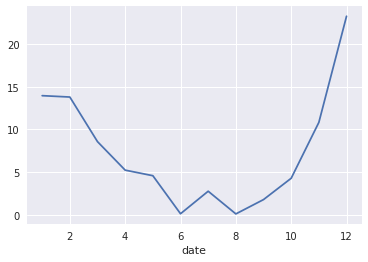

In [111]:
trr.groupby(trr.index.month).sum().dailyprecip.plot()

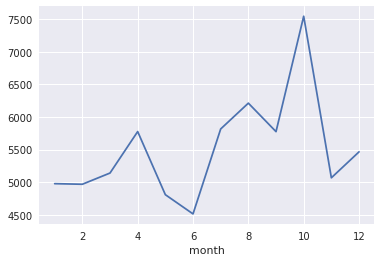

In [110]:
bw_env.groupby(bw_env.month).lresult_gt_lmedian.sum().plot()

In [107]:
bw_env.groupby(bw_env['precip_month_q']).lresult_gt_lmedian.sum()

precip_month_q
1    22320.0
2    12355.0
3    15986.0
4    15413.0
Name: lresult_gt_lmedian, dtype: float64

In [104]:
bw_env.index.month.all

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Int64Index([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', length=202257)>